<h2><a href="https://leetcode.com/problems/time-needed-to-inform-all-employees">1376. Time Needed to Inform All Employees</a></h2><h3>Medium</h3><hr><p>A company has <code>n</code> employees with a unique ID for each employee from <code>0</code> to <code>n - 1</code>. The head of the company is the one with <code>headID</code>.</p>

<p>Each employee has one direct manager given in the <code>manager</code> array where <code>manager[i]</code> is the direct manager of the <code>i-th</code> employee, <code>manager[headID] = -1</code>. Also, it is guaranteed that the subordination relationships have a tree structure.</p>

<p>The head of the company wants to inform all the company employees of an urgent piece of news. He will inform his direct subordinates, and they will inform their subordinates, and so on until all employees know about the urgent news.</p>

<p>The <code>i-th</code> employee needs <code>informTime[i]</code> minutes to inform all of his direct subordinates (i.e., After informTime[i] minutes, all his direct subordinates can start spreading the news).</p>

<p>Return <em>the number of minutes</em> needed to inform all the employees about the urgent news.</p>

<p>&nbsp;</p>
<p><strong class="example">Example 1:</strong></p>

<pre>
<strong>Input:</strong> n = 1, headID = 0, manager = [-1], informTime = [0]
<strong>Output:</strong> 0
<strong>Explanation:</strong> The head of the company is the only employee in the company.
</pre>

<p><strong class="example">Example 2:</strong></p>
<img alt="" src="https://assets.leetcode.com/uploads/2020/02/27/graph.png" style="width: 404px; height: 174px;" />
<pre>
<strong>Input:</strong> n = 6, headID = 2, manager = [2,2,-1,2,2,2], informTime = [0,0,1,0,0,0]
<strong>Output:</strong> 1
<strong>Explanation:</strong> The head of the company with id = 2 is the direct manager of all the employees in the company and needs 1 minute to inform them all.
The tree structure of the employees in the company is shown.
</pre>

<p>&nbsp;</p>
<p><strong>Constraints:</strong></p>

<ul>
	<li><code>1 &lt;= n &lt;= 10<sup>5</sup></code></li>
	<li><code>0 &lt;= headID &lt; n</code></li>
	<li><code>manager.length == n</code></li>
	<li><code>0 &lt;= manager[i] &lt; n</code></li>
	<li><code>manager[headID] == -1</code></li>
	<li><code>informTime.length == n</code></li>
	<li><code>0 &lt;= informTime[i] &lt;= 1000</code></li>
	<li><code>informTime[i] == 0</code> if employee <code>i</code> has no subordinates.</li>
	<li>It is <strong>guaranteed</strong> that all the employees can be informed.</li>
</ul>


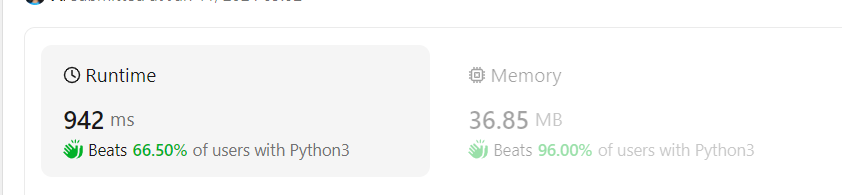

In [ ]:
from typing import List
class Solution:
    def __init__(self):
        self.total_time = 0
        

    def numOfMinutes(self, n: int, headID: int, manager: List[int], informTime: List[int]) -> int:
    
        adj = [[] for _ in range(n)]
        for i in range(n):              # Create adjacenecy graph , since manager[i] is the parent and i is the employee, so we append i 
            if manager[i] != -1:
                adj[manager[i]].append(i)   
        
        queue = deque([(headID, 0)])  # th first ekement we insert in the queue is the headId(root of tree) and time taken to inform him which is 0 since he already know 
        while queue:
            node, time = queue.popleft()
            for child in adj[node]:
                self.total_time = max(self.total_time , time + informTime[node]) # then we add up the time we already had and time we got from informtime of manager
                queue.append((child, time + informTime[node])) # next we will send the added time

        return self.total_time